# <b>911 Data Analysis</b>

Author: Osman Muglu\
Date Created: 12-03-2021\
Data source: https://www.kaggle.com/mchirico/montcoalert

## Index


<ol>
    <li>Forming the dataframe</li>
    <li>Exploratory data analysis</li>
    <li>Conclusion</li>
</ol>

# <b>1. Forming the dataframe</b>

### 1.1 Importing the required packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In this data set are 9 columns, these are:
<ul>
<li><b>lat</b> - Latitude</li>
<li><b>lng</b> - Longitude</li>
<li><b>desc</b> - Description of the Emergency Call</li>
<li><b>zip</b> - Zipcode</li>
<li><b>title</b> - Title</li>
<li><b>timeStamp</b> - YYYY-MM-DD HH:MM:SS</li>
<li><b>twp</b> - Township</li>
<li><b>addr</b> - Address</li>
<li><b>e</b> - Dummy variable</li>
</ul>  

### 1.2 Read the csv file

In [36]:
df= pd.read_csv("911.csv")
df.columns = ['Latitude', 'Longitude', 'Description', 'Zipcode', 'Title', 'Timestamp', 'Township', 'Address', 'E']
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 1.3 Data wrangling for feature creation

<i>Create column "Reason" data</i>

In [37]:
df['Reason'] = df[ 'Title'] .str.split(':', expand=True)[1].str.replace(' -', '')
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


<i>Create column "Reason Category"</i>

In [38]:
df['Reason_Category'] = df["Title"].str.split(':', expand=True)[0]
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E,Reason,Reason_Category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


<i>Create the columns "Hour", "Month" and "Day Of the Week" </i>

In [39]:
type(df['Timestamp'][0])

str

In [40]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [41]:
df['Hour'] = df['Timestamp'].apply(lambda x: x.hour)
df['Month'] = df['Timestamp'].apply(lambda x: x.month)
df['Day of Week'] = df['Timestamp'].apply(lambda x: x.dayofweek)
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E,Reason,Reason_Category,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,3


<i>Convert the data</i>

In [42]:
conv_d = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [43]:
df['Day of Week'] = df['Day of Week'].map(conv_d)

df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E,Reason,Reason_Category,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,Thu


<i>Create column "Date"</i>

In [44]:
df['Date']=df['Timestamp'].apply(lambda x: x.date())

In [45]:
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E,Reason,Reason_Category,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,Thu,2015-12-10


<i>Creating column "Station_Num"</i>

In [46]:
df['Station_Num'] = df["Description"].str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,Latitude,Longitude,Description,Zipcode,Title,Timestamp,Township,Address,E,Reason,Reason_Category,Hour,Month,Day of Week,Date,Station_Num
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,Thu,2015-12-10,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,Thu,2015-12-10,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,Thu,2015-12-10,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,Thu,2015-12-10,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,Thu,2015-12-10,329


# <b>2. Explotary data analysis</b>


### 2.1 Dataframe description

In [47]:
df.describe()

,Latitude,Longitude,Zipcode,E,Hour,Month
count,663522.000000,663522.000000,583323.000000,663522.0,663522.000000,663522.000000
mean,40.158162,-75.300105,19236.055791,1.0,13.044202,6.334414
std,0.220641,1.672884,298.222637,0.0,5.652192,3.475113
min,0.000000,-119.698206,1104.000000,1.0,0.000000,1.000000
25%,40.100344,-75.392735,19038.000000,1.0,9.000000,3.000000
50%,40.143927,-75.305143,19401.000000,1.0,13.000000,6.000000
75%,40.229008,-75.211865,19446.000000,1.0,17.000000,9.000000
max,51.335390,87.854975,77316.000000,1.0,23.000000,12.000000


In [48]:
df.shape

(663522, 16)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Latitude         663522 non-null  float64       
 1   Longitude        663522 non-null  float64       
 2   Description      663522 non-null  object        
 3   Zipcode          583323 non-null  float64       
 4   Title            663522 non-null  object        
 5   Timestamp        663522 non-null  datetime64[ns]
 6   Township         663229 non-null  object        
 7   Address          663522 non-null  object        
 8   E                663522 non-null  int64         
 9   Reason           663522 non-null  object        
 10  Reason_Category  663522 non-null  object        
 11  Hour             663522 non-null  int64         
 12  Month            663522 non-null  int64         
 13  Day of Week      663522 non-null  object        
 14  Date             663

In [50]:
df["Station_Num"].str.replace(':', '')

0           332
1           345
2         STA27
3          308A
4           329
          ...  
663517     None
663518     322A
663519      313
663520    STA27
663521     None
Name: Station_Num, Length: 663522, dtype: object

### 2.2 Emergency calls analysis

#### 2.2.1 Reason for call


<i>Reason category</i>

In [51]:
df['Reason_Category'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason_Category, dtype: int64

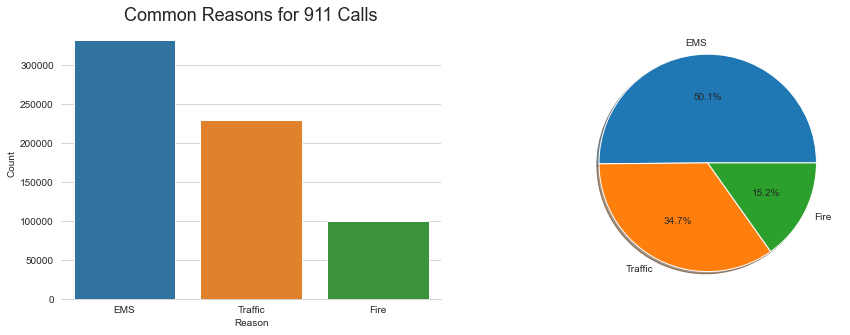

In [72]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='Reason_Category', data=df, order=df['Reason_Category'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=18)
axes[0].set(xlabel='Reason', ylabel='Count')

df['Reason_Category'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)

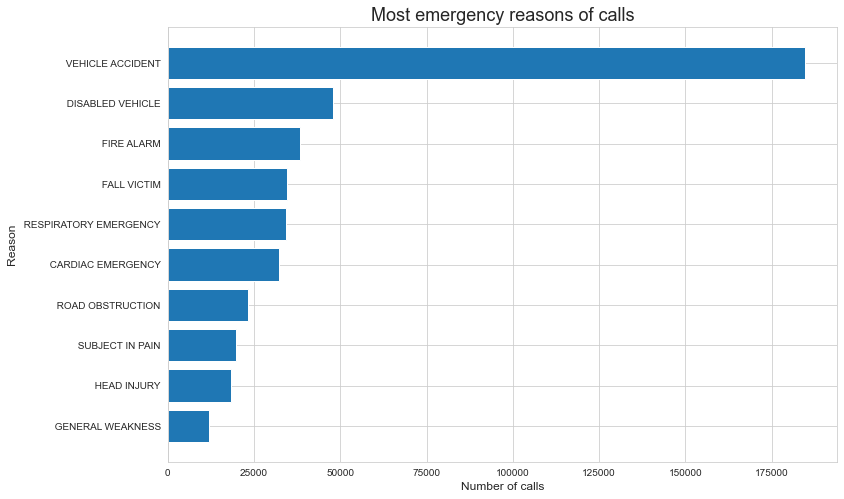

In [75]:
top10_reasons = df['Reason'].value_counts().head(10)
plt.figure(figsize=(12, 8))
x = list(top10_reasons.index)
y = list(top10_reasons.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls", size=18)
plt.ylabel("Reason", size=12)
plt.xlabel("Number of calls", size=12)

plt.barh(x, y)
plt.show()

<i>Traffic Reasons</i>

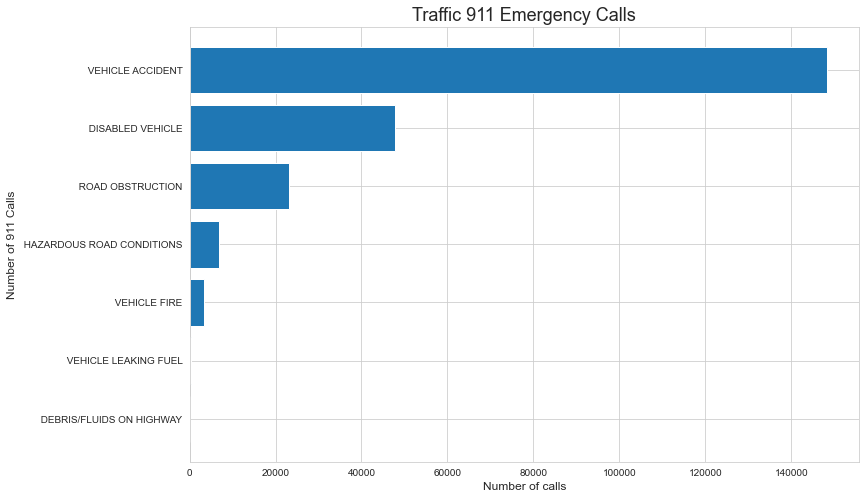

In [76]:
traffic = df[df['Reason_Category']=='Traffic'].groupby('Reason').count()['Latitude'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
x = list(traffic.index)
y = list(traffic.values)
x.reverse()
y.reverse()

plt.title('Traffic 911 Emergency Calls', size=18)
plt.ylabel('Number of 911 Calls', size=12)
plt.xlabel("Number of calls", size=12)

plt.barh(x, y)
plt.show()

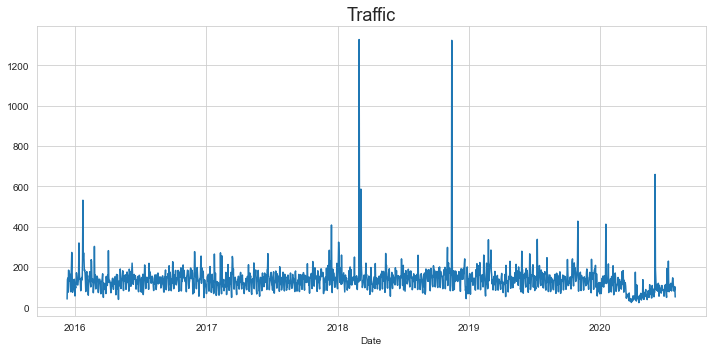

In [77]:
df[df['Reason_Category']=='Traffic'].groupby('Date').count()['Township'].plot()
plt.title('Traffic', size=18)
plt.tight_layout()

<i>Fire Reasons</i>

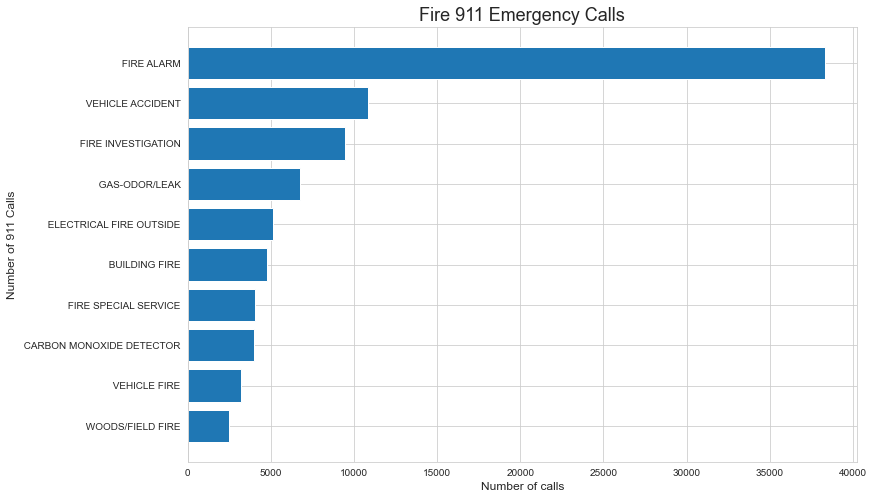

In [78]:
fire = df[df['Reason_Category']=='Fire'].groupby('Reason').count()['Latitude'].sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
x = list(fire.index)
y = list(fire.values)
x.reverse()
y.reverse()

plt.title('Fire 911 Emergency Calls', size=18)
plt.ylabel('Number of 911 Calls', size=12)
plt.xlabel("Number of calls", size=12)

plt.barh(x, y)
plt.show()

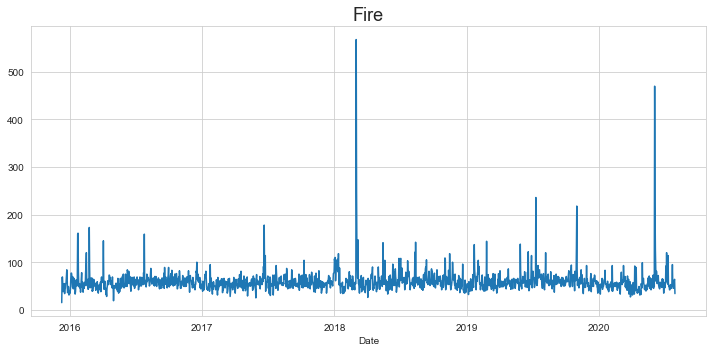

In [79]:
df[df['Reason_Category']=='Fire'].groupby('Date').count()['Township'].plot()
plt.title('Fire', size=18)
plt.tight_layout()

<i>EMS Reason</i>

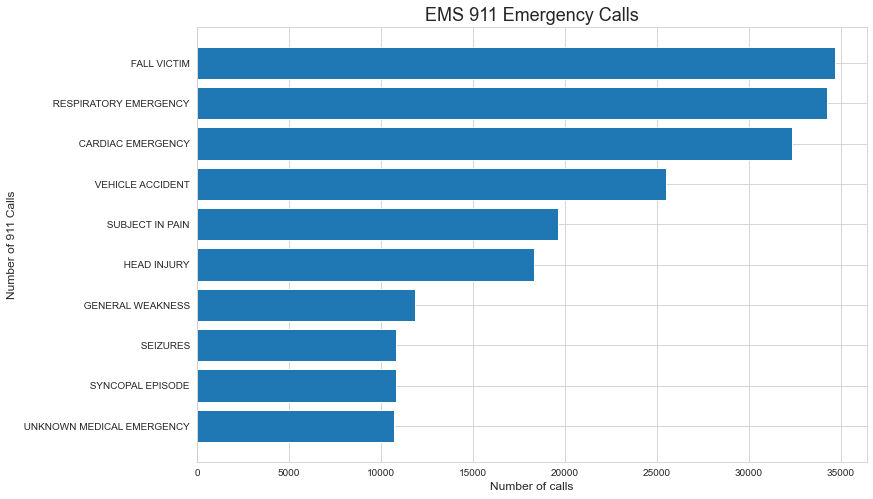

In [80]:
EMS = df[df['Reason_Category']=='EMS'].groupby('Reason').count()['Latitude'].sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
x = list(EMS.index)
y = list(EMS.values)
x.reverse()
y.reverse()

plt.title('EMS 911 Emergency Calls', size=18)
plt.ylabel('Number of 911 Calls', size=12)
plt.xlabel("Number of calls", size=12)

plt.barh(x, y)
plt.show()

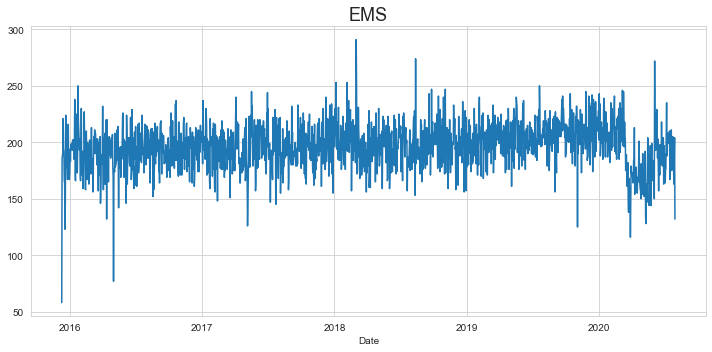

In [81]:
df[df['Reason_Category']=='EMS'].groupby('Date').count()['Township'].plot()
plt.title('EMS', size=18)
plt.tight_layout()

#### 2.2.2 Distribution of calls 

<i>Day of Week</i>

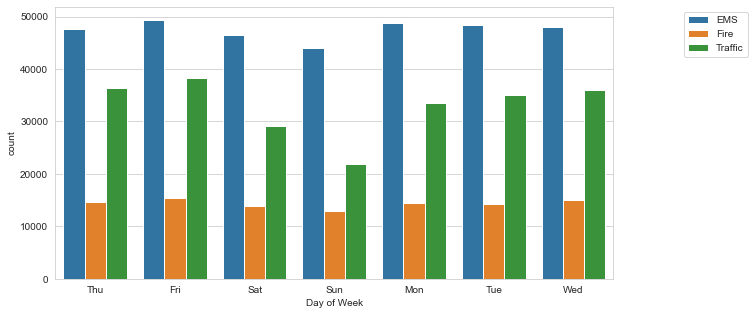

In [83]:
sns.countplot(x=df['Day of Week'],hue=df['Reason_Category'])
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

<i>Month</i>

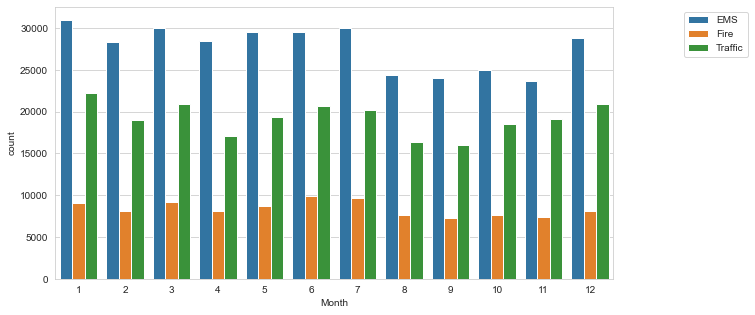

In [61]:
sns.countplot(x=df['Month'],hue=df['Reason_Category'])
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

In [62]:
month= df.groupby(['Month']).count()

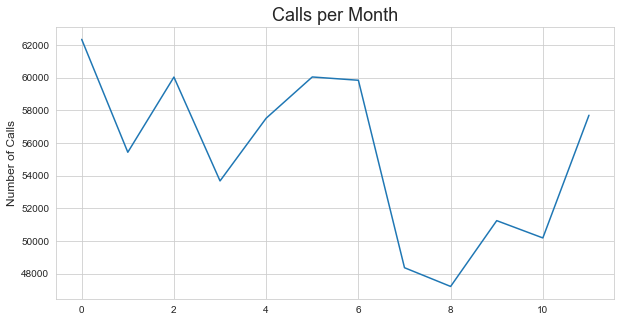

In [70]:
month['E'].plot.line(y='E')
plt.title('Calls per Month', size= 18)
plt.ylabel('Number of Calls', size= 12)
plt.show()

In [66]:
month.reset_index(inplace=True)

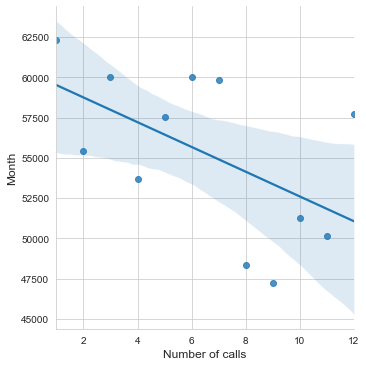

In [84]:
sns.lmplot(x='Month',y='E',data=month)
plt.ylabel('Number of Calls')
plt.ylabel('Month', size=12)
plt.xlabel("Number of calls", size=12)
plt.show()

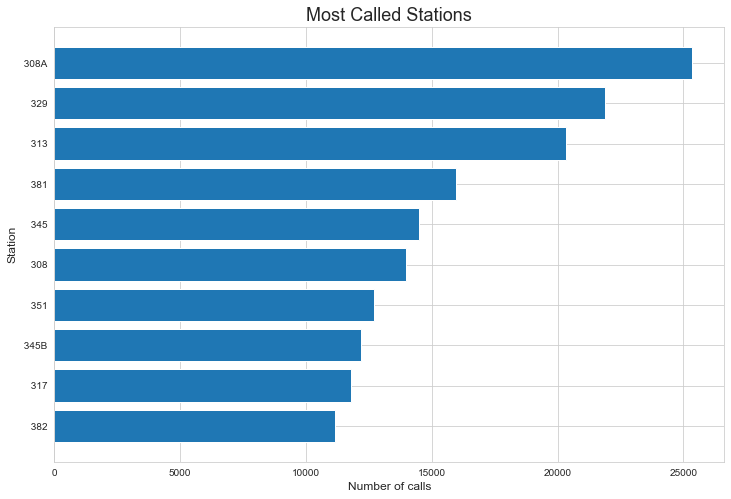

In [87]:
top10 = df["Station_Num"].str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(top10.index)
y = list(top10.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations", size=18)
plt.ylabel("Station", size=12)
plt.xlabel("Number of calls", size=12)

plt.barh(x, y)

plt.show()

<i>Hours</i>

In [88]:
day_hour = df.pivot_table(values='Latitude',index='Day of Week',columns='Hour',aggfunc='count')
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


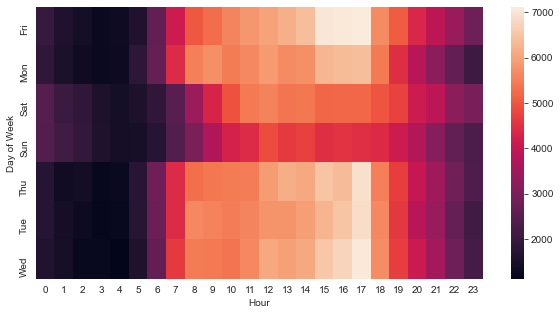

In [89]:
sns.heatmap(day_hour)
plt.show()

# <b>3. Conclusions for videogame sales analysis 1980-2015</b>

<b>2.2.1 Reason for calls:</b>\
<i>Reason category</i>: The reason why people are calling the emergency line is divided into three categories. These are as follows: EMS is first with 50.1% and 332692 calls, traffic is second with 34.7% and 230208 calls, and Fire is third with 15.2% 100622 calls.

<i>Reason</i>: We also created a feature to see the top 10 reasons why people call the emergency line. These are as follows: \
(1) Vehicle accident,\
(2) Disabled vehicle,\
(3) Fire alarm, \
(4) Fall victim, \
(5) Respiratory emergency, \
(6) Cardiac emergency, \
(7) Road obstruction, \
(8) Subject in pain, \
(9) Head injury\
(10) General weakness. 

<i>Traffic Reasons</i>:  We also looked at the most common reasons within each category. The reasons for the traffic emergency calls are as follows: \
(1) Vehicle accident, \
(2) Disabled vehicle, \
(3) Road obstruction, \
(4) Hazardous road conditions, \
(5) Vehicle fire, \
(6) Vehicle leaking fuel, \
(7) Debris/Fluids on the highway. 

2018 was the year with the highest peaks of traffic emergency calls.

<i>Fire Reasons</i>: The reasons for the fire emergency calls are a follows: \
(1) Fire alarm, \
(2) Vehicle accident, \
(3) Fire investigation, \
(4) Gas-odor/leak, \
(5) Electrical fire outside, \
(6) Building fire, \
(7) Fire special service, \
(8) Carbon monoxide detector, \
(9) Vehicle fire,\
(10) Woods/field fire. 

2018 was also the year with the highest peaks of fire emergency calls.

<i>EMS Reason</i>: The reasons for the EMS emergency calls are as follows: \
(1) Fall victim, \
(2) Respiratory emergency, \
(3) Cardiac emergency, \
(4) Vehicle accident, \
(5) Subject in pain, \
(6) Head injury, \
(7) General weakness, \
(8) seizures, \
(9) Syncopal episode,\
(10) Unknown medical emergency. 

2018 was the year with the highest peaks of EMS emergency calls.

<b>2.2.2 Distribution of calls</b>\
<i>Day of Week</i>:  The data shows us that the emergency calls are the lowest on the weekends and the highest on Friday.  

<i>Month</i>: We can see in the data that the month September has the lowest calls and that January has the highest. Besides, when we look at the other visualizations we see that the number of emergency calls is low and decreasing during the holiday season. 

<i>Hours</i>: We see that most calls take place around the end of office hours on weekdays.